In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define Newton's Method for finding roots
def newton(f, f1, x_n, tol=1e-6):
    while abs(f(x_n)) > tol:
        x_n = x_n - f(x_n)/f1(x_n)
    return x_n

In [3]:
f = lambda x: (x - 4) * (x + 1)
g = lambda x: (x - 1) * (x + 3)
h = lambda x: (x - 4) * (x - 1) * (x + 3)
sinc = lambda x: np.sinc(x/np.pi) 

In [4]:
f1 = lambda x: 2*x - 3
g1 = lambda x: 2*x + 2
h1 = lambda x: 3*x**2 - 4*x - 11
sinc1 = lambda x: 0 if x == 0 else np.cos(x)/x - np.sin(x)/x**2

In [5]:
f_roots = np.array([-1, 4])
g_roots = np.array([-3, 1])
h_roots = np.array([-3, 1, 4])

In [6]:
colors = ["ro", "go", "bo"]

In [7]:
x = np.linspace(-10, 10, 100)

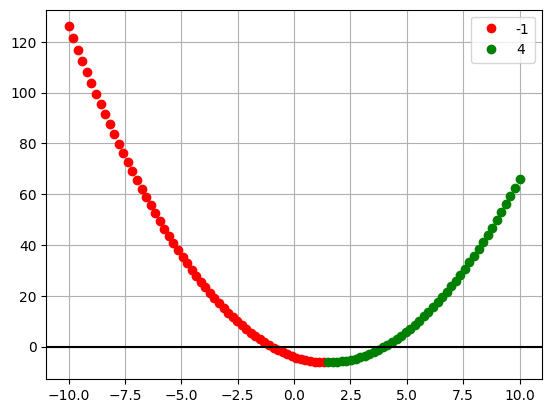

In [8]:
for x_i in x:
    root = newton(f, f1, x_i)
    distances = abs(f_roots-root)
    index = np.argmin(distances)
    color = colors[index]
    plt.plot(x_i, f(x_i), color)

handles = [plt.plot([], color, label=f"{k}")  for k, color in zip(f_roots, colors)]
plt.grid()
plt.legend()
plt.axhline(y=0, color='k');

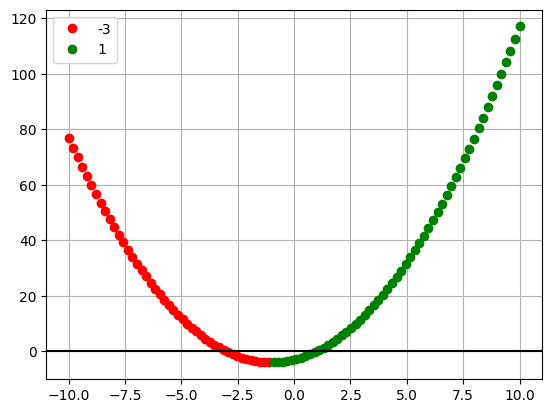

In [9]:
for x_i in x:
    root = newton(g, g1, x_i)
    distances = abs(g_roots-root)
    index = np.argmin(distances)
    color = colors[index]
    plt.plot(x_i, g(x_i), color)


handles = [plt.plot([], color, label=f"{k}")  for k, color in zip(g_roots, colors)]
plt.grid()
plt.legend()
plt.axhline(y=0, color='k');

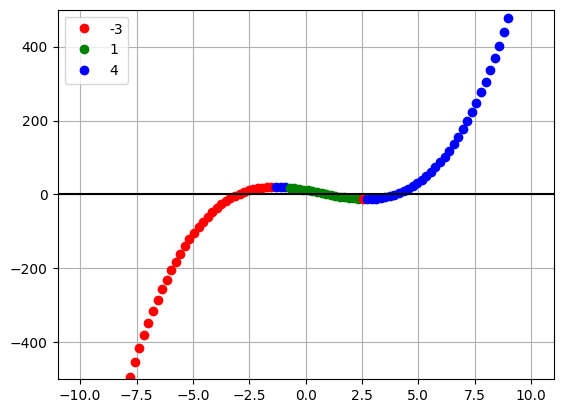

In [10]:
for x_i in x:
    root = newton(h, h1, x_i)
    distances = abs(h_roots-root)
    index = np.argmin(distances)
    color = colors[index]
    plt.plot(x_i, h(x_i), color)

handles = [plt.plot([], color, label=f"{k}")  for k, color in zip(h_roots, colors)]
plt.grid()
plt.legend()
plt.ylim(-500, 500)
plt.axhline(y=0, color='k');

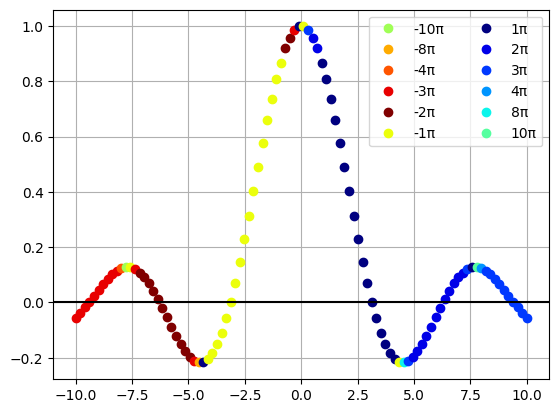

In [11]:
k_seen = set()

for x_i in x:    
    root = newton(sinc, sinc1, x_i)
    k = round(root / np.pi)
    k_seen.add(k)

possible_k = np.array(list(k_seen))
colors_k = plt.cm.jet(np.linspace(0, 1, len(k_seen)))

for x_i in x:    
    root = newton(sinc, sinc1, x_i)
    k = round(root / np.pi)
    distances = abs(k-possible_k)
    index = np.argmin(distances)
    color = colors_k[index]
    plt.plot(x_i, sinc(x_i), 'o', color=color)

handles = [plt.plot([], "o", color=color, label=f"{k}π") for k, color in sorted(zip(possible_k, colors_k), key=lambda x: x[0])]

plt.grid()
plt.legend(ncols=2)
plt.axhline(y=0, color='k');

In [15]:
newton(g, g1, -1)

ZeroDivisionError: division by zero